<a href="https://colab.research.google.com/github/anieruth007/CSE3040_DATA_SCIENCE_PROJECT/blob/main/Team12_Final_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Outlier Data:
                      City       Date  Card Type Exp Type Gender    Amount
89        Bengaluru, India   5-Jan-14       Gold    Bills      F  327947.0
128           Delhi, India  27-Jan-14       Gold    Bills      F  315873.0
186           Delhi, India   2-Jan-14       Gold    Bills      F  326922.0
189  Greater Mumbai, India  17-Jan-14       Gold    Bills      F  333483.0
191       Bengaluru, India  18-Mar-15     Silver    Bills      F  327244.0
221  Greater Mumbai, India   9-May-15     Silver    Bills      F  334116.0
244  Greater Mumbai, India  16-Oct-14   Platinum    Bills      F  326162.0
245           Delhi, India  19-Apr-15   Platinum    Bills      F  316946.0
307       Bengaluru, India  12-Oct-14  Signature    Bills      F  331349.0
334  Greater Mumbai, India   3-Mar-15       Gold    Bills      F  327971.0
345       Ahmedabad, India  28-Aug-14  Signature    Bills      F  338527.0


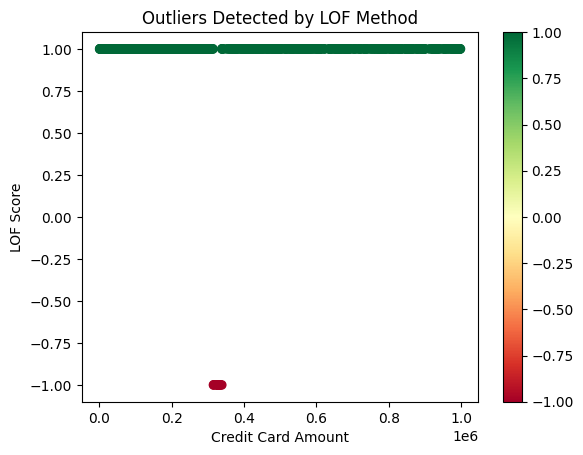

In [ ]:

import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt

# Load your credit card transactions dataset
data = pd.read_csv('Dataset.csv')
data1 = pd.read_csv('Dataset.csv')

# Drop null values --> Data Cleaning
data['Amount'].fillna(data['Amount'].median(), inplace=True)

# Select relevant features (assuming numerical encoding for categorical columns)
amount = data['Amount'].values.reshape(-1, 1)  # Consider adding other relevant features for better outlier detection

clf = LocalOutlierFactor(n_neighbors=40, contamination=0.01)
outlier_scores = clf.fit_predict(amount)

# Get the outlier data
outlier_data = data[outlier_scores == -1]

# Print the outlier data
print("Outlier Data:")
print(outlier_data)

# Plot the outliers
plt.scatter(data['Amount'], outlier_scores, c=outlier_scores, cmap='RdYlGn')
plt.xlabel('Credit Card Amount')
plt.ylabel('LOF Score')
plt.title('Outliers Detected by LOF Method')
plt.colorbar()
plt.show()




In [ ]:
#descriptive statistics
data=data.describe()
print(data)

              Amount
count    1099.000000
mean   287716.423112
std    253059.211237
min      1400.000000
25%    110266.500000
50%    218805.000000
75%    338819.500000
max    998077.000000


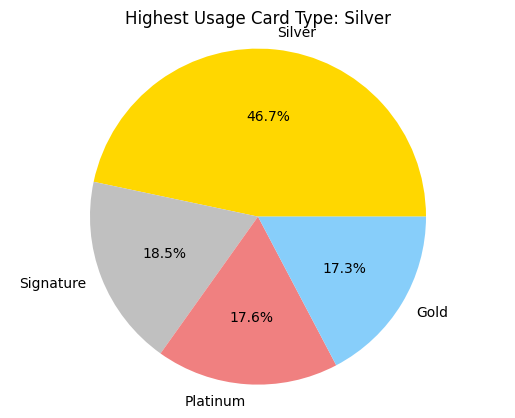

In [ ]:
#Data Visualization

import pandas as pd

# Load your credit card transactions dataset
data = pd.read_csv('Dataset.csv')
grouped_data = data['Card Type'].value_counts()
highest_usage = grouped_data.idxmax()
colors = ['gold', 'silver', 'lightcoral', 'lightskyblue']
plt.pie(grouped_data, labels=grouped_data.index, colors=colors, autopct='%1.1f%%')
plt.title('Highest Usage Card Type: ' + highest_usage)
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd

# Load your credit card transactions dataset
data = pd.read_csv('Dataset.csv')

# Check the column names in the dataset
print(data.columns)

expenses_by_card_type = data.groupby('Card Type')['Exp Type'].value_counts().unstack().fillna(0)
print(expenses_by_card_type)

Index(['City', 'Date', 'Card Type', 'Exp Type', 'Gender', 'Amount'], dtype='object')
Exp Type   Bills  Entertainment   Food  Fuel  Grocery
Card Type                                            
Gold       121.0            0.0   69.0   0.0      0.0
Platinum   120.0            0.0   73.0   0.0      0.0
Signature  128.0            0.0   75.0   0.0      0.0
Silver     172.0           64.0  145.0  53.0     79.0


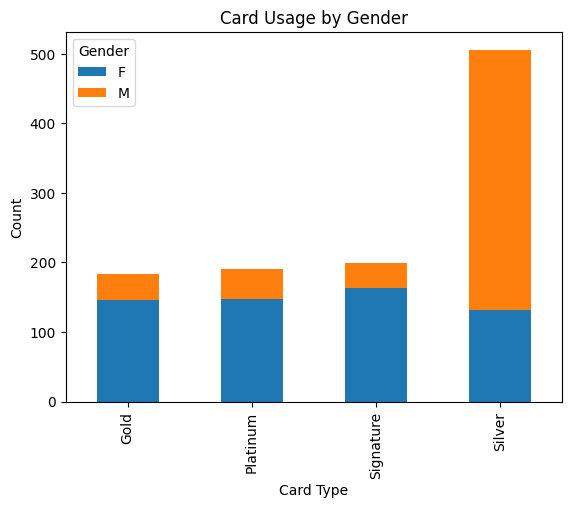

In [ ]:
grouped_data = data.groupby(['Card Type', 'Gender']).size().unstack()
grouped_data.plot(kind='bar', stacked=True)
plt.title('Card Usage by Gender')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()


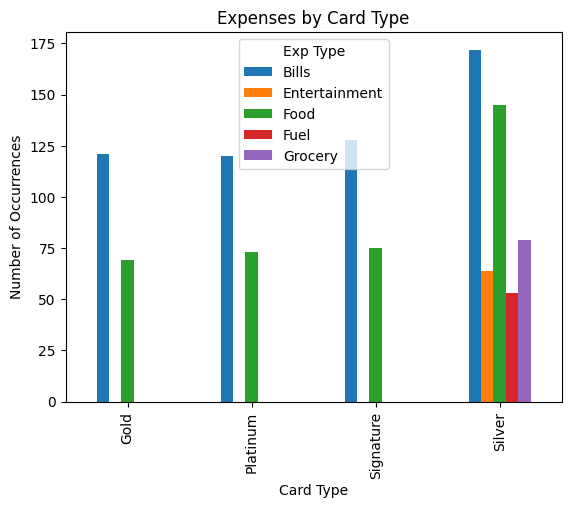

In [ ]:
import matplotlib.pyplot as plt

expenses_by_card_type.plot(kind='bar')
plt.title('Expenses by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Number of Occurrences')
plt.show()

In [ ]:
#to display the highest expenses with each card type
max_expenses_by_card_type = expenses_by_card_type.idxmax(axis=1)
print(max_expenses_by_card_type)


Card Type
Gold         Bills
Platinum     Bills
Signature    Bills
Silver       Bills
dtype: object


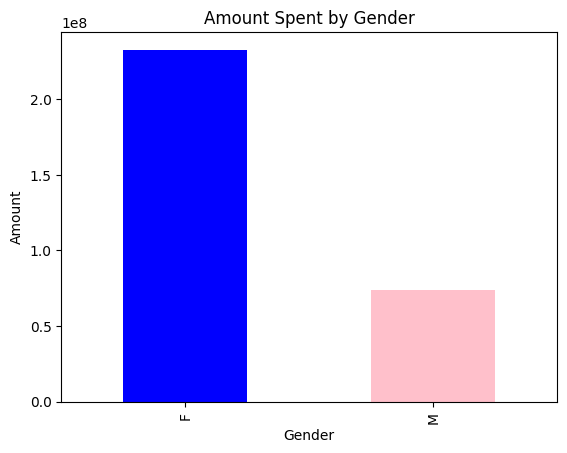

In [ ]:
#Bar plot - Data Visualization

grouped_data = data.groupby('Gender')['Amount'].sum()

# Define colors for each gender
colors = ['blue', 'pink']

# Create a bar plot using the grouped data and colors
grouped_data.plot(kind='bar', color=colors)
plt.title('Amount Spent by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Mean Imputation


import pandas as pd

# Load the CSV file
data = pd.read_csv('Dataset.csv')

print(data.isnull().sum())
print(data['Gender'])
# Define category mapping
category_mapping = {'M': 0, 'F': 1}

# Replace values that match the keys in category_mapping and keep others as is
data['Gender'] = data['Gender'].map(category_mapping)
mean_gender = data['Gender'].mean()
# Round off the mean gender value
mean_gender_rounded = round(mean_gender)
# Fill null values in the 'Gender' column with the mean gender value
data['Gender'].fillna(mean_gender_rounded, inplace=True)

category_mapping = {0: 'M', 1: 'F'}

# Create a new column with categorical data based on the existing numerical column
data['Gender'] = data['Gender'].map(category_mapping)


print(data['Gender'])

mean_amount = data['Amount'].mean()
data['Amount'].fillna(mean_amount, inplace=True)



print(data.isnull().sum())





City          0
Date          0
Card Type     0
Exp Type      0
Gender       20
Amount       10
dtype: int64
0       NaN
1         F
2         F
3         F
4         F
       ... 
1094      M
1095      M
1096      M
1097      M
1098      M
Name: Gender, Length: 1099, dtype: object
0       F
1       F
2       F
3       F
4       F
       ..
1094    M
1095    M
1096    M
1097    M
1098    M
Name: Gender, Length: 1099, dtype: object
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64


In [ ]:
 #Feature Selection

import pandas as pd
from scipy.stats import chi2_contingency

# Load the dataset
data = pd.read_csv('Dataset.csv')

# Assuming 'categorical_column' is your categorical variable and 'amount_column' is your numerical variable
categorical_column = 'Gender'
amount_column = 'Amount'

# Create a contingency table
contingency_table = pd.crosstab(data[categorical_column], data[amount_column])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the chi-square statistic and p-value
print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between 'Card Type' and 'Amount'.")
else:
    print("Accept the null hypothesis. There is no significant association between 'Card Type' and 'Amount'.")


Chi-square Statistic: 1070.0
P-value: 0.4597927297910859
Accept the null hypothesis. There is no significant association between 'Card Type' and 'Amount'.


In [ ]:
#Feature Selection

# Install the necessary module
!pip install scikit-learn

# Import the necessary module
from sklearn.preprocessing import LabelEncoder

#turning categorical data into numerical data
import pandas as pd
df = pd.read_csv('Dataset.csv')
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
encoded_df = df.copy()
for column in ['City','Date', 'Card Type', 'Exp Type', 'Gender']:
    encoded_df[column] = label_encoder.fit_transform(df[column])

print(encoded_df)


      City  Date  Card Type  Exp Type  Gender    Amount
0        2   352          0         0       0   82475.0
1        3   228          1         0       0   32555.0
2        1   314          3         0       0  101738.0
3        3    50          2         0       0  123424.0
4        1   422          0         0       0  171574.0
...    ...   ...        ...       ...     ...       ...
1094     3   281          3         4       1  209052.0
1095     2    79          3         1       1   21500.0
1096     1   210          3         0       1  299152.0
1097     2    10          3         2       1  284125.0
1098     0   111          3         0       1  236081.0

[1099 rows x 6 columns]


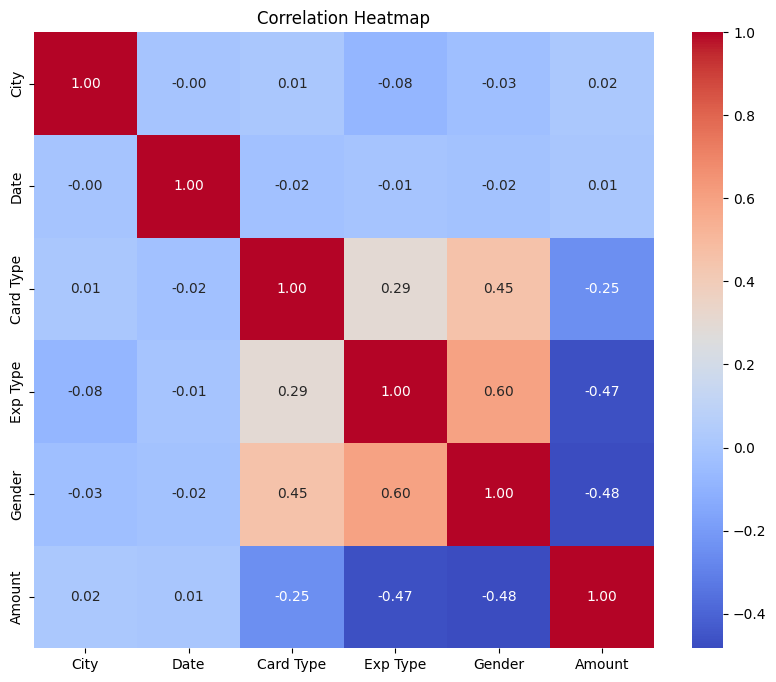

In [ ]:
#Heat Map

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'encoded_df' contains your encoded dataframe

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Define the features (excluding 'Amount' and 'Date') and target variable
features = encoded_df.columns.drop(['Amount', 'Date'])  # Exclude 'Amount' and 'Date' columns
X = encoded_df[features]
y = encoded_df['Amount']

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Support Vector Regression (SVR) model
svr_model = SVR(kernel='rbf')  # You can specify different kernels (e.g., 'linear', 'poly', 'rbf')

# Initialize list to store MSE scores
mse_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the SVR model
    svr_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svr_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Calculate mean MSE across folds
mean_mse = sum(mse_scores) / len(mse_scores)

# Normalize the MSE value
scaler = MinMaxScaler()
normalized_mse = scaler.fit_transform([[mse] for mse in mse_scores])[0][0]

print("Normalized Mean Squared Error (MSE) for SVR:", normalized_mse)


Normalized Mean Squared Error (MSE) for SVR: 0.015953366804435376
